In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

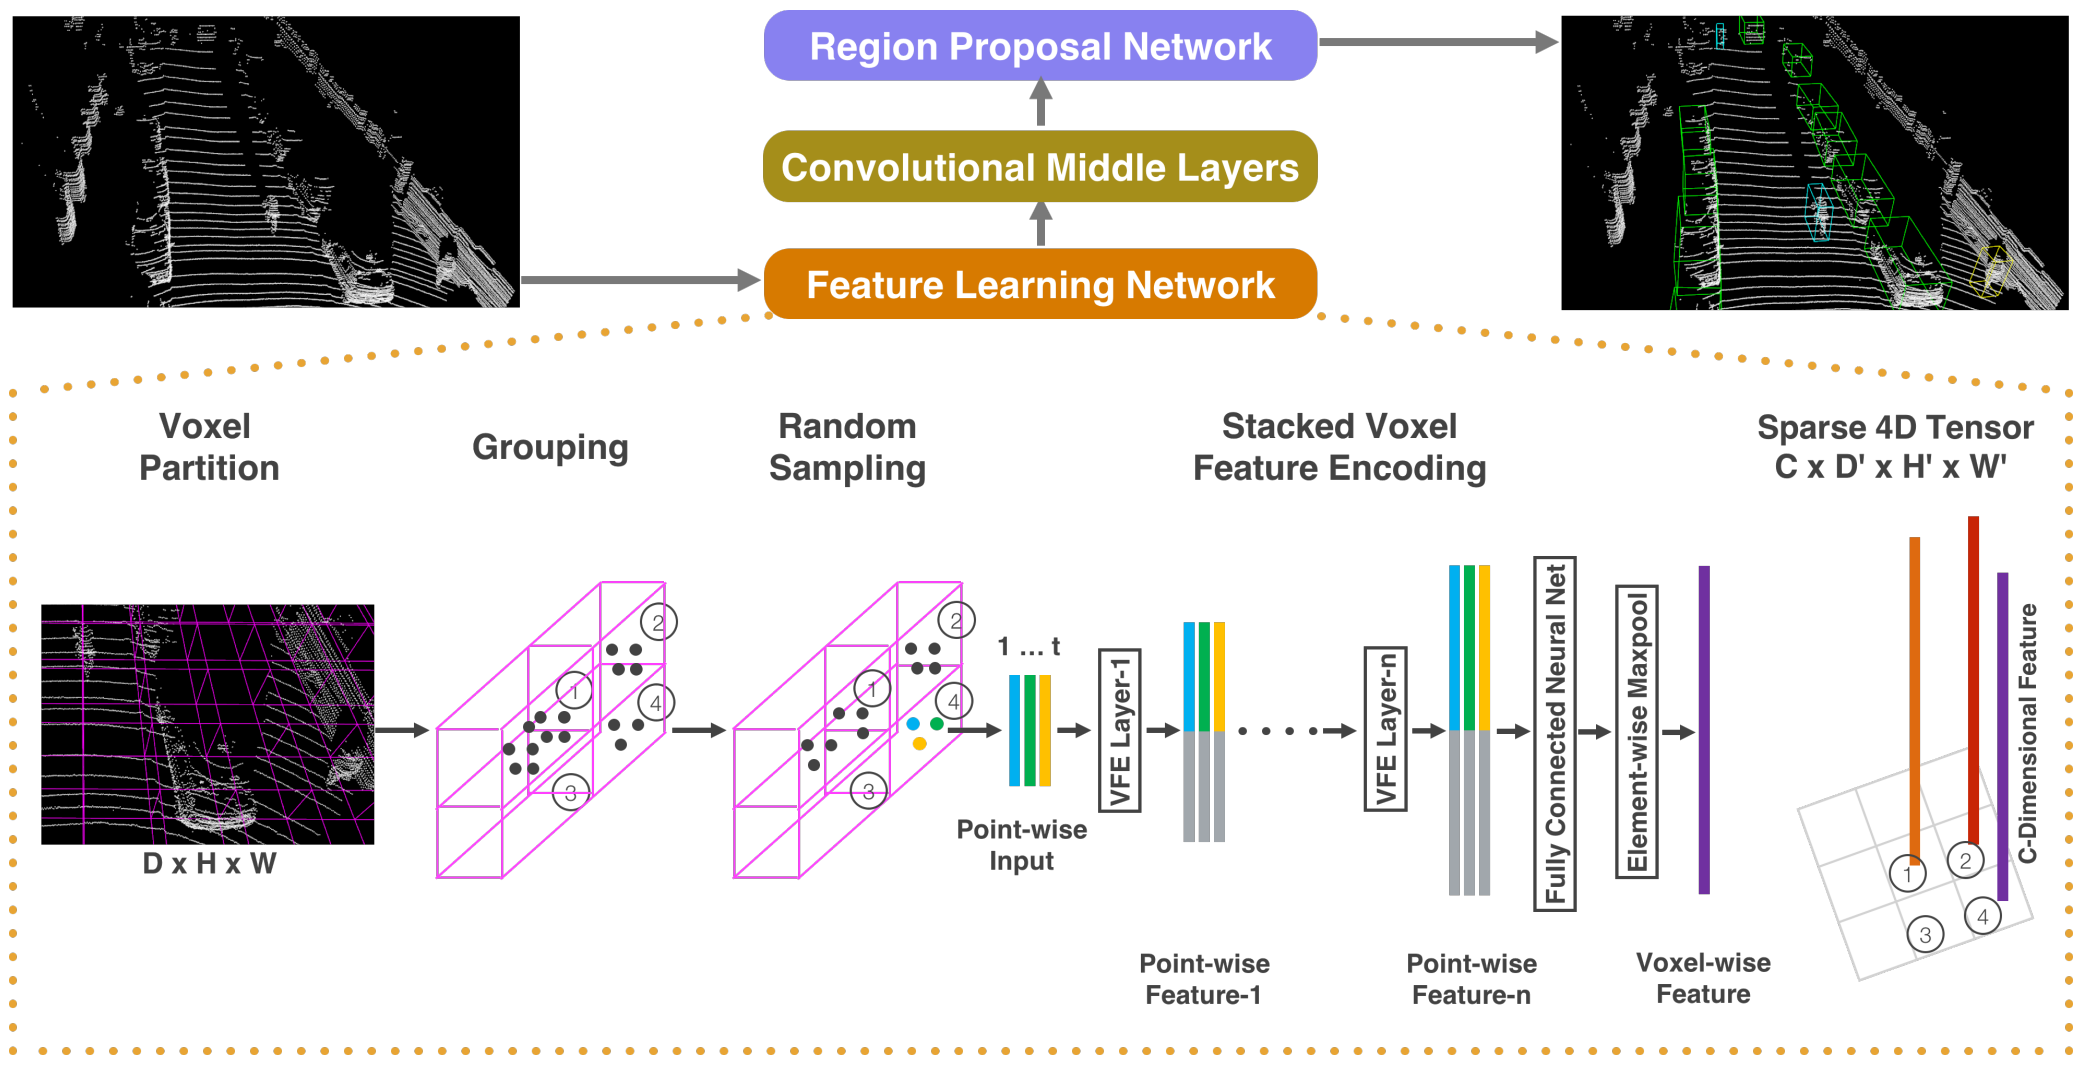

**feature learning network**           
1.voxel partion:将空间划分为一个个堆叠的、相同大小的voxel          
2.grouping：上面将空间划分为一个个的voxel了，grouping这一步的作用就是将3d点云数据装进一个个的voxel中，实现分组       
3.random sampling:随即采样，将点云数量超过T的voxel中的点云数量降到T     


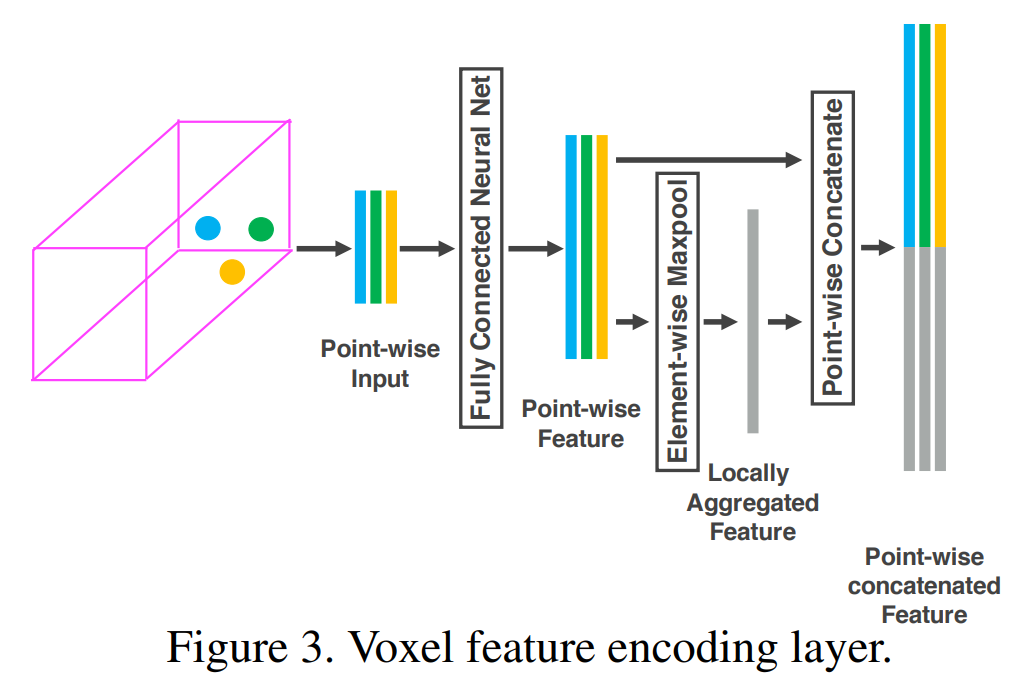         
**VFE**:先把点集送到一个FCN全连接层中提取点云特征。因为FCN是逐点计算的，没有引入点与点之间的关系，所以接下来是哟个element-wise maxpool,获得locally aggregated feature，能部分反映局部关系。将point-wise feature和locally aggregated feature进行堆叠融合，作为下一个VFE层的输入

**中间卷积层**      
点云通过特征学习网络后变成一个**稀疏**的4d张量，(C, D', H', W')，c为voxel-wise feature的向量维度，D‘,H', W'为空间的深度，高度和宽度(voxel)       
使用3d卷积来构建中间卷基层，**扩大感受野，增加更多信息描述**